<a href="https://colab.research.google.com/github/oneway-net/scientific-python/blob/main/Lecture_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 5 - SciPy

Announcement 
1. HW 1 will be due next week before the lecture 

# Basic Section (Start)===================



What we have seen so far
- Basic python language features
- Introduction to NumPy
- Plotting using matplotlib

Scipy is a collection of packages that provide useful mathematical functions commonly used for scientific computing.

List of subpackages (We will focus on the highlight ones)
- cluster : Clustering algorithms
- constants : Physical and mathematical constants
- fftpack : Fast Fourier Transform routines
- **integrate** : Integration and ordinary differential equation solvers
- **interpolate** : Interpolation and smoothing splines
- io : Input and Output
- ndimage : N-dimensional image processing
- odr : Orthogonal distance regression
- **optimize** : Optimization and root-finding routines
- signal : Signal processing
- sparse : Sparse matrices and associated routines
- spatial : Spatial data structures and algorithms
- special : Special functions
- **stats** : Statistical distributions and functions

We cannot cover all of them in detail but we will go through some of the packages and their capabilities today

- interpolate
- optimize
- stats
- integrate

(Optional)
We will also briefly look at some other useful packages
- networkx
- sympy

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from numpy import linalg as la

## Interpolation : `scipy.interpolate`

In [ ]:
import scipy.interpolate as interp

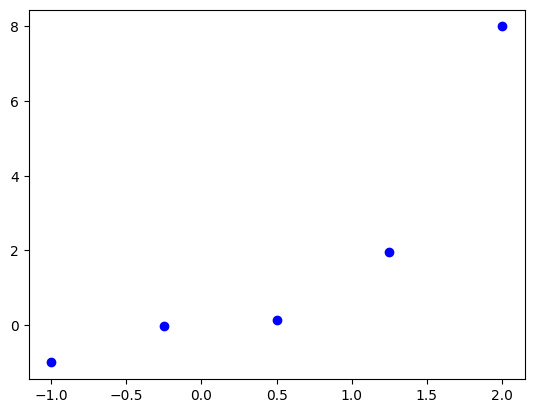

In [ ]:
x = np.linspace(-1,2,5);
y = x**3
plt.plot(x,y,'bo')

In [ ]:
f = interp.interp1d(x,y,kind="linear") #estimate the linear step-wise functions 

In [ ]:
f(1)

array(1.34375)

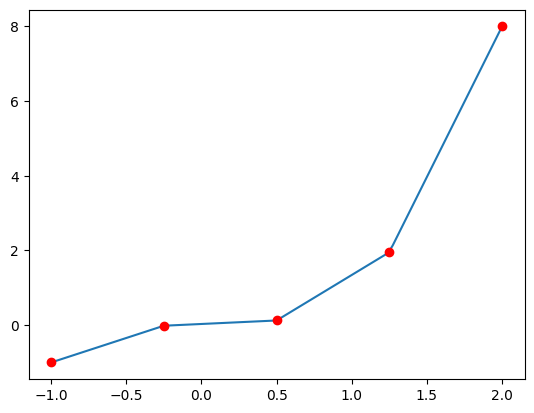

In [ ]:
x_fine = np.linspace(-1,2,100)
plt.plot(x_fine,f(x_fine))

plt.plot(x,y,'ro')

In [ ]:
f(3)

ValueError: ignored

In [ ]:
f = interp.interp1d(x,y,kind="linear", fill_value="extrapolate") 
#estimate the linear step-wise functions 

In [ ]:
f(3)

array(16.0625)

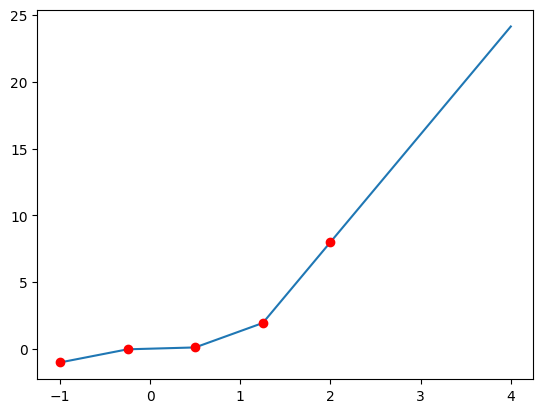

In [ ]:
x_fine = np.linspace(-1,4,100)
plt.plot(x_fine,f(x_fine))

plt.plot(x,y,'ro')

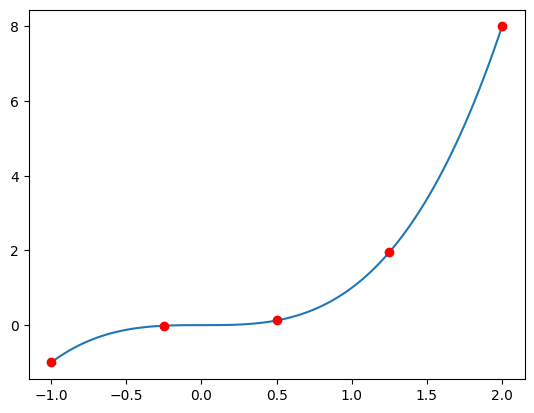

In [ ]:
x_fine = np.linspace(-1,2,100)
# plt.plot(x_fine,interp.interp1d(x,y,kind="zero")(x_fine)) #stepwise fit
# plt.plot(x_fine,interp.interp1d(x,y,kind="linear")(x_fine)) #best linear fit
plt.plot(x_fine,interp.interp1d(x,y,kind="cubic")(x_fine)) #best fit curve
plt.plot(x,y,'ro')

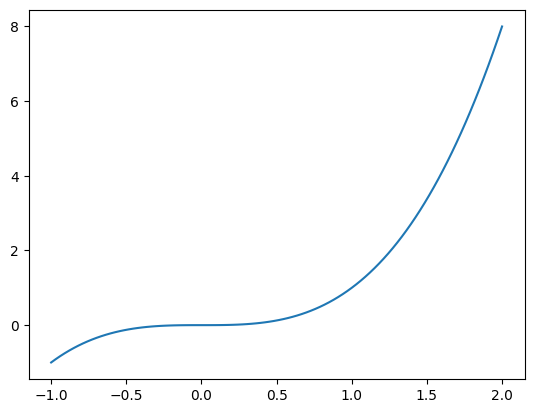

In [ ]:
x1 = np.linspace(-1,2,100)
y1 = x1**3
plt.plot(x1,y1)

In [ ]:
# Optional: Interpolate over a 2-D grid.
?interp.interp2d # -> deprecated
#z = f(x,y)
# -> UPdate the latest version of the 2d interpolation 

Object `interp.interp2d # -> deprecated` not found.


## Optimization : `scipy.optimize`

Contains functions to find minima, roots and fit parameters 

In [ ]:
from scipy import optimize

In [ ]:
# Def a function with one arg x
def f(x):
    return x**4 - 10*x**2 

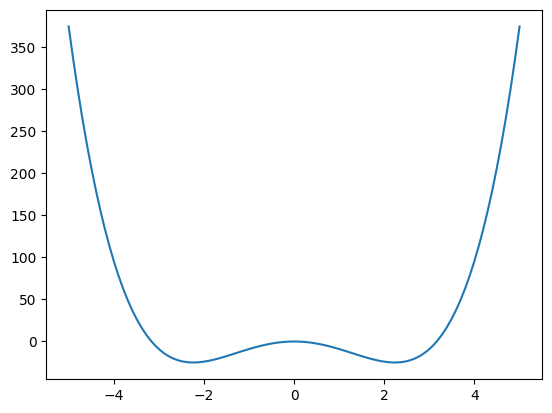

In [ ]:
x = np.linspace(-5,5,100)
plt.plot(x,f(x));

In [ ]:
# find the argmin(function)
results = optimize.minimize(f, -0.5) # function and initial guess
results

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -24.999999999999932
        x: [-2.236e+00]
      nit: 5
      jac: [ 2.146e-06]
 hess_inv: [[ 2.496e-02]]
     nfev: 18
     njev: 9

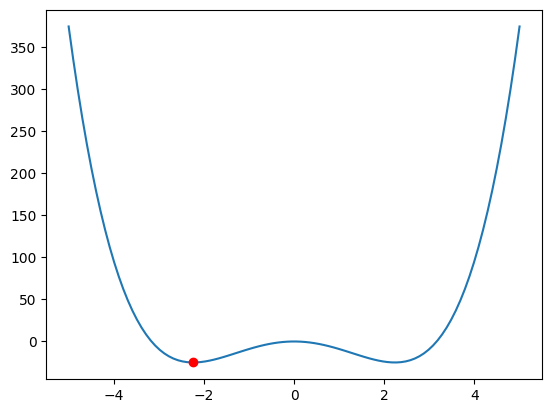

In [ ]:
# let's plot the min points we found
# TODO: What if we change the initial guess??? Try to change -0.5 to 1
plt.plot(x,f(x));
results = optimize.minimize(f, -0.5)
plt.plot(results.x,f(results.x),'ro');

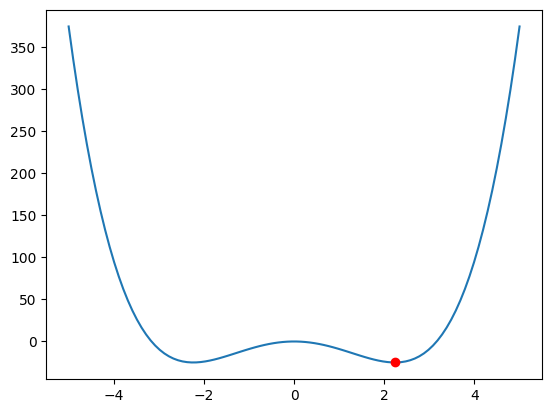

In [ ]:
plt.plot(x,f(x));
results = optimize.minimize(f, 0.5)
plt.plot(results.x,f(results.x),'ro');

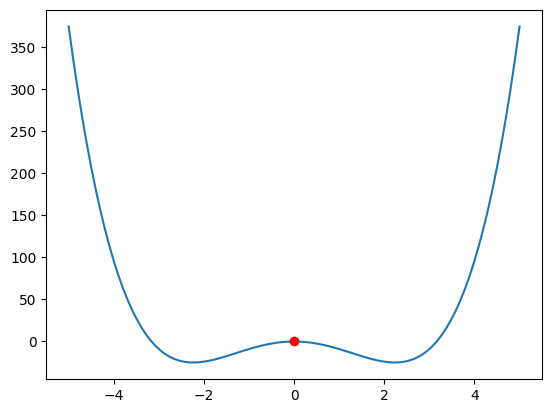

In [ ]:
plt.plot(x,f(x));
results = optimize.minimize(f, 0)
plt.plot(results.x,f(results.x),'ro');

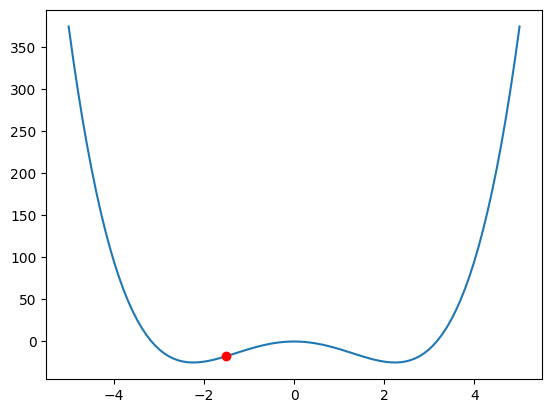

In [ ]:
# What happen if we define the bounds and find the min value
plt.plot(x,f(x));
results = optimize.minimize(f, -0.5, bounds=[(-1.5,0)])
x_opt = results.x
plt.plot(x_opt,f(x_opt),'ro');

In [ ]:
# input can be a int or numpy array data collection as multi-variate equation
# add bounds to define the bounds for each variable element in x
def f(x, const_parameter1, const_parameter2):
    return const_parameter2* const_parameter1*(x[0]*x[0] + x[1]*x[1] + 5*(np.sin(2*x[0]) +np.sin(2*x[1])))

results = optimize.minimize(f, np.array([1,0]), bounds=[(-1,2),(-3,3)],args = (3,4))
results

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: -50.679919312898136
        x: [ 2.000e+00 -7.138e-01]
      nit: 7
      jac: [-3.044e+01  1.421e-06]
     nfev: 27
     njev: 9
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>

In [ ]:
?optimize.minimize

# Basic Section (End)===================

## Curve Fitting

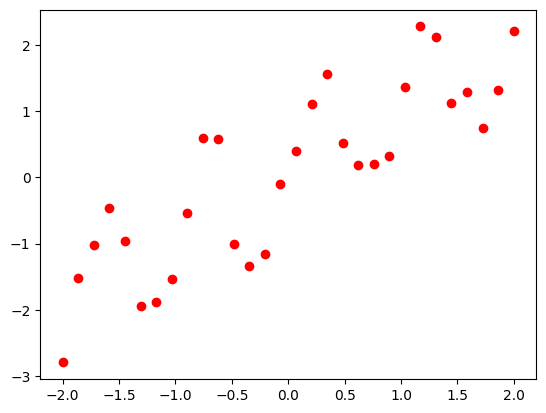

In [ ]:
# wave pattern
x = np.linspace(-2,2,30)
y = x+np.sin(6.5*x)+0.3*np.random.randn(30)
plt.plot(x,y,'ro')

In [ ]:
# let's take a guess 
def f(x,a,b):
    return a*x +b

In [ ]:
((a,b),_) = optimize.curve_fit(f,x,y,(0,1))
a,b

(0.9298240643065006, 0.055832799837867375)

In [ ]:
optimize.curve_fit?

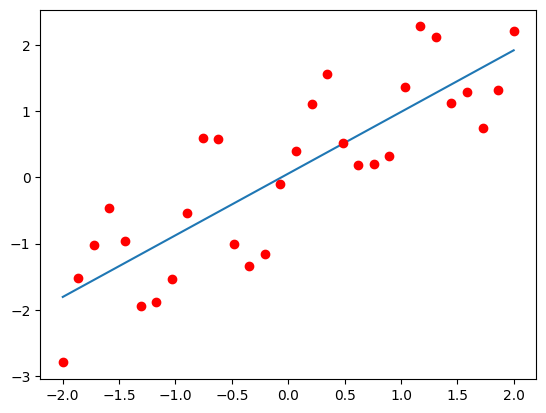

In [ ]:
x_fine = np.linspace(-2,2,200)
plt.plot(x_fine,f(x_fine,a,b))
plt.plot(x,y,'ro')

In [ ]:
# Let's use our example data in the begining, replacing the parameters into variables, and let python figure out
# what is the bes t fitting values for a,b,c?
def g(x,a,b,c,d):
    return a*x +b*np.sin(c*x)+d

# y = a*x +b*np.sin(c*x)

In [ ]:
#initial guess of a,b,c = 1.5, 0, 7, which may affect the results
((a,b,c,d),_) = optimize.curve_fit(g,x,y,(1.5,0,7,0)) 
a,b,c,d

(0.9825964718840168,
 0.9747783727963407,
 6.553702832500636,
 0.05583279699924473)

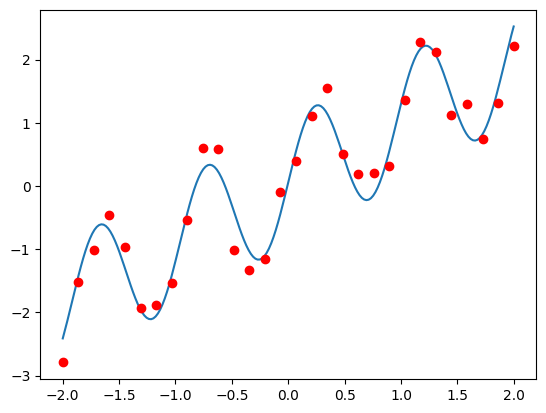

In [ ]:
x_fine = np.linspace(-2,2,200)
plt.plot(x_fine,g(x_fine,a,b,c,d))
plt.plot(x,y,'ro')

### Root Finding

In [ ]:
# Apply the optimize.root function to find the root value making f() = 0 
def f(x):
    return np.sin(x)

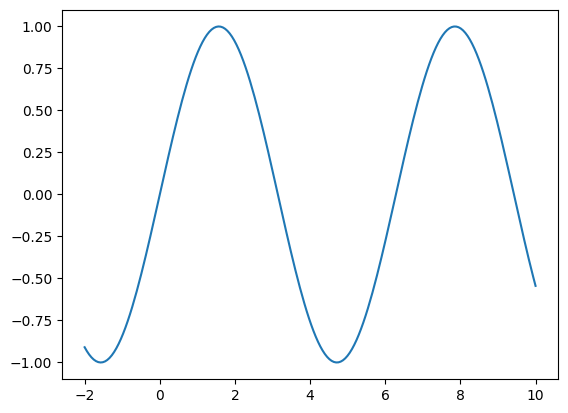

In [ ]:
x_fine = np.linspace(-2,10,200)
plt.plot(x_fine,f(x_fine))

In [ ]:
r = optimize.root(f,2)
r.x

array([3.14159265])

In [ ]:
f(r.x)

array([1.2246468e-16])

#### check more about [scipy.optimize](https://docs.scipy.org/doc/scipy/tutorial/optimize.html?highlight=optimization#)

## Linear programming
A very common case is linear programming (LP). These are optimization problems that can be written in the form

$$
\begin{equation}
\begin{split}
\text{minimize} \;\; & c^{T}x  \\
\text{subject to} \;\; & A_{ub}x \leq b_{ub} \\
& A_{eq}x = b_{eq}
\end{split}
\end{equation}
$$

Here, we are finding the vector $x$ that minimizes the dot product $c^T x$, where $c$ is some fixed vector, out of all $x$ that satisfy $A_{ub}x \leq b_{ub}$ and $A_{eq}x = b_{eq}$, where $A_{ub}$ and $A_{eq}$ are matrices and $b_{ub}$ and $b_{eq}$ are vectors.

## Exercise (Post-Lecture)
Using Google and reading documentation are important parts of programming. [`scipy.optimize`](https://docs.scipy.org/doc/scipy/reference/optimize.html) comes with specialized functions for solving linear programming problems.

Figure out how to solve LPs using `scipy.optimize`, and solve the following LP:
$$
\begin{equation}
\begin{split}
\text{minimize} \;\; & x_1 + 2 x_2  \\
\text{subject to} \;\; & x_1 \leq 1 \\
& 5 x_1 + x_2 \geq 0
\end{split}
\end{equation}
$$

Note that the problem is equivalent to

$$
\begin{equation}
\begin{split}
\text{minimize} \;\; & c^T x  \\
\text{subject to} \;\; & A_{ub}x \leq b_{ub} \\
& A_{eq}x = b_{eq}
\end{split}
\end{equation}
$$
where
$$
c = \begin{pmatrix} 1 \\ 2 \end{pmatrix} \qquad 
A_{ub} = \begin{pmatrix} 1 & 0 \\ -5 & -1 \end{pmatrix}, \qquad
b_{ub} = \begin{pmatrix} 1 \\ 0 \end{pmatrix}, \qquad
A_{eq} = 0, \qquad
b_{eq} = 0.
$$

We can see this because 
$$
 \begin{pmatrix} 1 & 0 \\ -5 & -1 \end{pmatrix} \begin{pmatrix} x_1 \\ x_2 \end{pmatrix} \leq \begin{pmatrix} x_1 \\ -5x_1 - x_2 \end{pmatrix} 
$$

In [ ]:
c = np.array([1,2])
Aub = np.array([[1,0],[-5,-1]])
bub = np.array([1,0])

In [ ]:
# #Answer
x1_bounds = (None, None)
x2_bounds = (None, None)

results = optimize.linprog(c, A_ub = Aub, b_ub = bub,bounds = [x1_bounds, x2_bounds])

c@results.x

HINT: check the documentation for [scipy.optimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html?highlight=scipy%20optimize%20linprog#scipy.optimize.linprog)

## Statistics : `scipy.stats`

In [ ]:
from scipy import stats

Find the maximum likelihood estimate for parameters

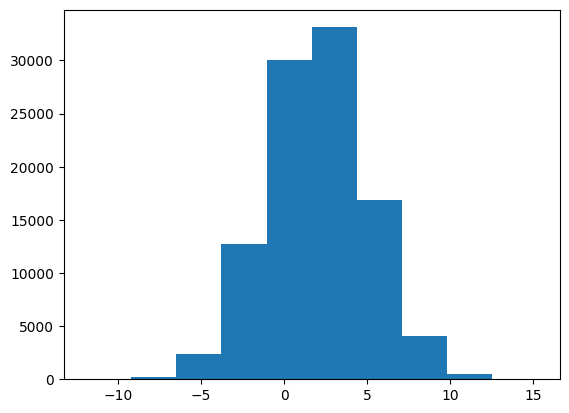

In [ ]:
samples = 3*np.random.randn(100000)+2
plt.hist(samples);

In [ ]:
stats.norm.fit(samples) #return mean and standard deviation

(2.008023872088307, 3.0039747072113725)

In [ ]:
a = np.random.randn(300)
b = np.random.randn(300) + 0.5 #try + 0.5

In [ ]:
# t test for independent distributions to see if they have equal means
# In shorts, assuming they have same mean, how likely our assumption would occur
stats.ttest_ind(a,b)

Ttest_indResult(statistic=-6.715307596326458, pvalue=4.371969189406215e-11)

In [ ]:
#Pearson correlation coefficient -> measuring if two data is correclated
# ?stats.pearsonr

In [ ]:
# if the expected value of a is significantly different from the expected value of b
a = np.random.randn(300)
b = np.random.randn(300)/2 + a/2

In [ ]:
stats.pearsonr(a,b) #r-value and p-value

PearsonRResult(statistic=0.755798398895927, pvalue=9.687949688982985e-57)

You can also perform kernel density estimation

In [ ]:
x = np.hstack(( 2*np.random.randn(1000)+5,  0.6*np.random.randn(1000)-1) )

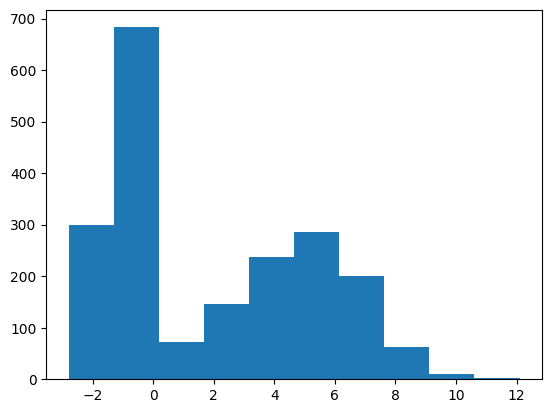

In [ ]:
plt.hist(x);

In [ ]:
pdf = stats.kde.gaussian_kde(x) 
#we have two distribution, but we are going to capture features from both

<ipython-input-66-106e9aa90fd9>:1: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  pdf = stats.kde.gaussian_kde(x)


In [ ]:
pdf(-1)

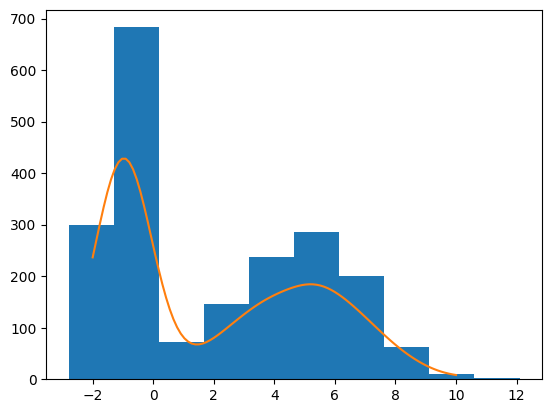

In [ ]:
counts,bins,_ = plt.hist(x)
x_fine=np.linspace(-2,10,100)
plt.plot(x_fine,np.sum(counts)*pdf(x_fine))

## Numerical Integration : `scipy.integrate`

In [ ]:
import scipy.integrate as integ

You can compute integral using the `quad` funtion

In [ ]:
def f(x):
  return 2*x

In [ ]:
integ.quad(f,0,2) #f and upper and lower bounds
# return value up to an error this much

(4.0, 4.440892098500626e-14)

In [ ]:
integ.quad?

You can also solve ODEs of the form
$$ \frac{dy}{dt} = f(y,t) $$

In [ ]:
def f(y,t): #dev function
    return (t*y[1], -y[1]-9*y[0])

In [ ]:
# f: Computes the derivative of y at t
# y0 = [1,1] Initial condition on y (can be a vector).
# t: A sequence of time points for which to solve for y.
# Return: Array containing the value of y for each desired time in t, 
#         with the initial value y0 in the first row.
t = np.linspace(0,10,100)
Y = integ.odeint(f,y0 =[1,1],t=t) 

In [ ]:
Y.shape

(100, 2)

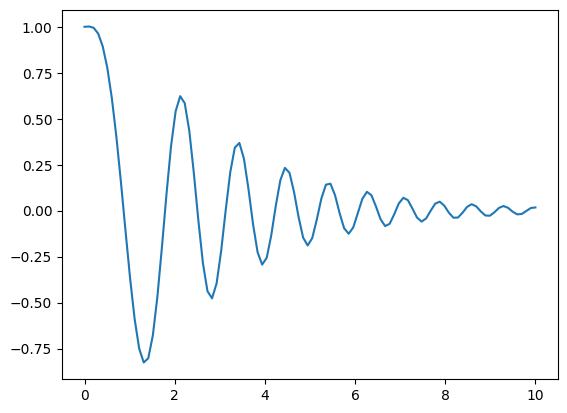

In [ ]:
plt.plot(t,Y[:,0])

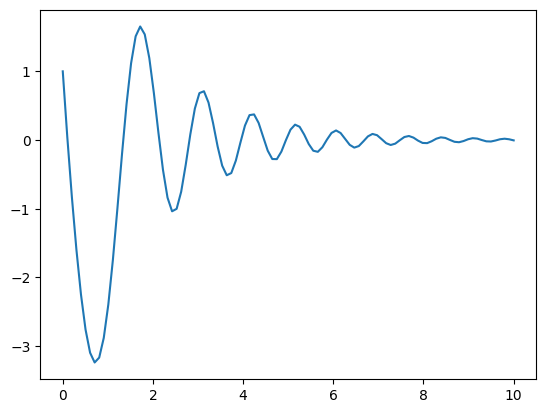

In [ ]:
plt.plot(t,Y[:,1])

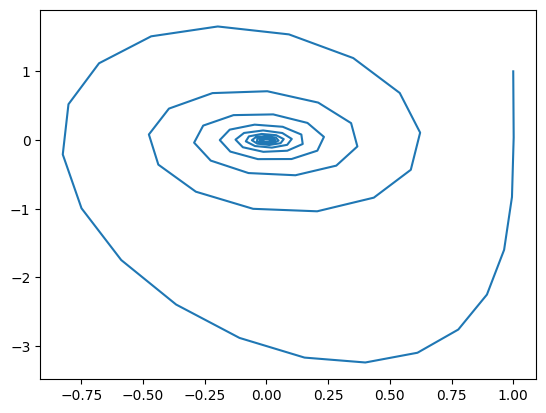

In [ ]:
plt.plot(Y[:,0],Y[:, 1])

## Physical simulation
Let's simulate a throwing a ball in two dimensions. The ball is described as a function of time by four functions: $x(t), y(t), v_x(t), v_y(t)$, which are governed by the ODE system:

$$
    \frac{dx}{dt} = v_x, \qquad
    \frac{dy}{dt} = v_y, \qquad
    \frac{dv_x}{dt} = 0, \qquad
    \frac{dv_y}{dt} = -g.
$$

We can think of this in vectorized form as:

$$
    \frac{d}{dt} \begin{pmatrix} x \\ y \\ v_x \\ v_y \end{pmatrix} = \begin{pmatrix} v_x \\ v_y \\ 0 \\ -g \end{pmatrix}
$$

In [ ]:
def dzdt(z, t):
    x, y, vx, vy = z
    g = 1
    return np.array([vx, vy, 0, -g])

In [ ]:
import matplotlib.pyplot as plt

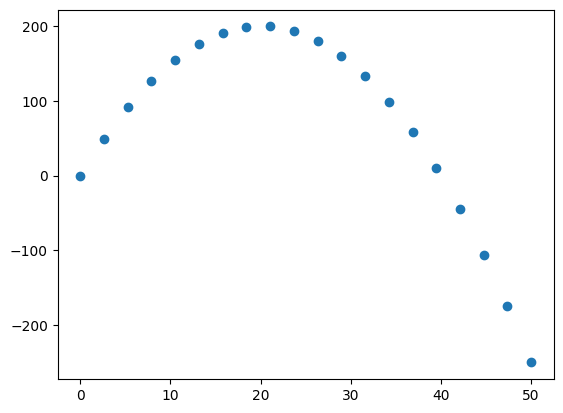

In [ ]:
x, y = 0, 0
vx, vy = 1, 20

z = np.array([x, y, vx, vy])
t = np.linspace(0, 50, 20)

result = integ.odeint(dzdt, z, t)

plt.scatter(result[:, 0], result[:, 1])
plt.show()

## Exercise(Post_lecture)
We can add drag with the following slight modification to the ODE, which adds a force with direction opposing the current velocity, and with magnitude proportional to the velocity squared.
    
$$
    \frac{d}{dt} \begin{pmatrix} x \\ y \\ v_x \\ v_y \end{pmatrix} = \begin{pmatrix} v_x \\ v_y \\ -\alpha v_x \sqrt{v_x^2 + v_y^2} \\ -g -\alpha v_y \sqrt{v_x^2 + v_y^2} \end{pmatrix}
$$

Implement this with $\alpha = 0.001$, plot the resulting trajectory, and compare to the dragless case.

In [ ]:
# def dzdt(z,t):
#   x,y,vx,vy = z
#   g = 1
#   a = 0.001
#   return np.array([vx,vy,0-a*vx*np.sqrt(vx*vx+vy*vy), -g-a*vy*np.sqrt(vx*vx+vy*vy)])
# x,y=0,0
# vx,vy=1,20
# z=np.array([x,y,vx,vy])
# t = np.linspace(0,50,20)

# res = integ.odeint(dzdt, z,t )

# plt.scatter(res[:,0], res[:,1])
# plt.show()

# Other useful packages (Optional)

## `networkx`
Useful Package to handle graphs.

Install by running `conda install networkx`

In [ ]:
import networkx as nx

In [ ]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4])
G.add_edge(1,2)
G.add_edge(2,3)
G.add_edge(3,1)
G.add_edge(3,4)


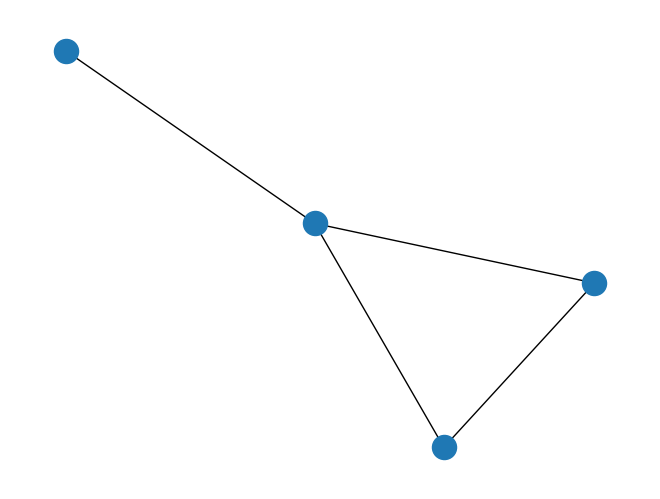

In [ ]:
nx.draw(G)

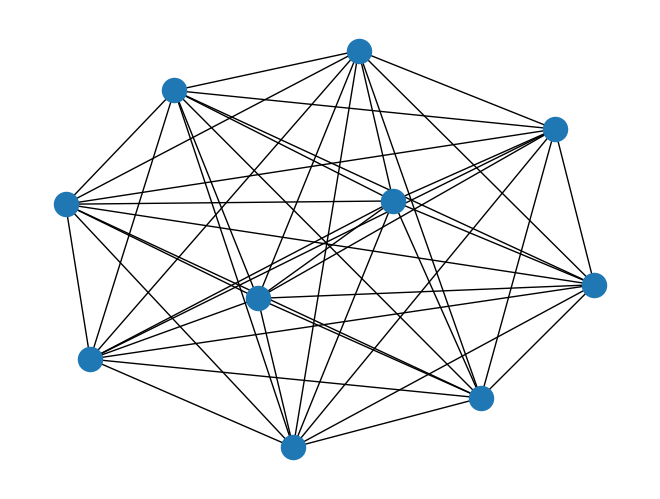

In [ ]:
G = nx.complete_graph(10)
nx.draw(G)

## `sympy`

Package for performing symbolic computation and manipulation.

Install it in your environment by running `conda install sympy`

In [ ]:
from sympy import *

In [ ]:
x,y = symbols(["x","y"])

In [ ]:
x

x

In [ ]:
expr = x+y**2

In [ ]:
expr

x + y**2

In [ ]:
x*expr

x*(x + y**2)

In [ ]:
expand(x*expr)

x**2 + x*y**2

In [ ]:
factor(x**2 - y**2)

(x - y)*(x + y)

In [ ]:
latex(expr)

'x + y^{2}'

In [ ]:
simplify( (x-y)**2 + (x+y)**2)

2*x**2 + 2*y**2

In [ ]:
x**2/(y**3+y)

x**2/(y**3 + y)

In [ ]:
(x**2/(y**3+y)).subs(y,(x/2)).simplify() #substitue value of y with another parameter

8*x/(x**2 + 4)

In [ ]:
(x**2/(y**3+y)).evalf(subs={'x':2, 'y':4}) #value plug in
# 4/(64+4)

0.0588235294117647

In [ ]:
Integral(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo)) #integration, infinity here is - with two o

Integral(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo))

In [ ]:
I = Integral(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo))

In [ ]:
I.doit() # do the calculation

pi

In [ ]:
(sin(x)/(1+cos(x)))

In [ ]:
(sin(x)/(1+cos(x))).series(x,0,10) #taylor series center at 0 with 10 terms